In [ ]:
pip install tensorflow pandas scikit-learn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.4_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=d353f619ec029195aff44291f738e2581c56b13c069ad27a35164516e3e86dc8
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 78.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import data_config as cfg

(208225, 11) (175657, 15) (175657, 52)


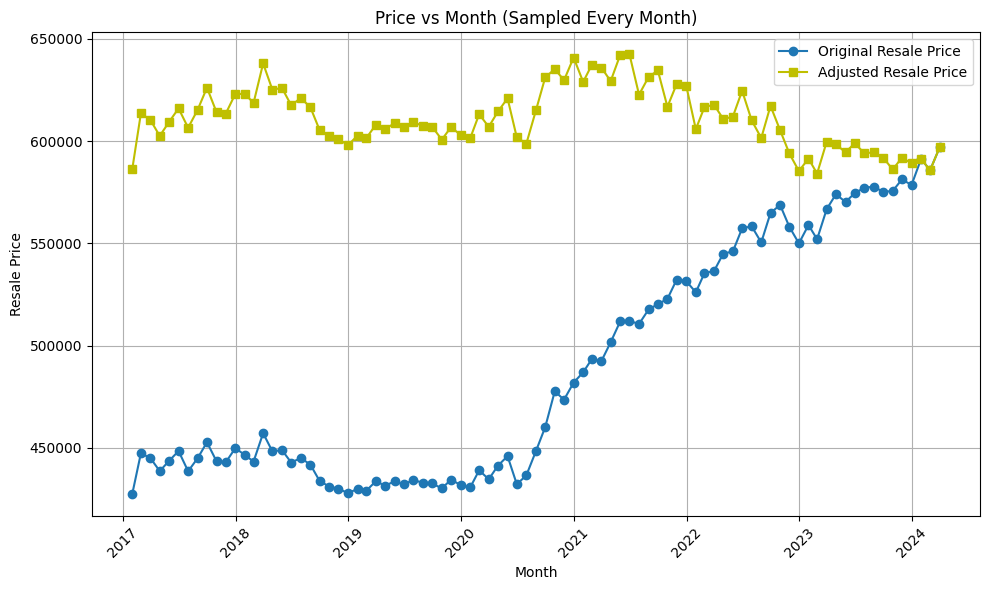

In [ ]:
df_raw = pd.read_csv('/content/data/SGHDB2017-2024.csv')
cfg.save_dataset_info(df_raw, fname='dataset_info.csv')

df = cfg.adjust_resale_price(df_raw, cut_off_date='2024-04-01')
cfg.visualize_adjusted_price(df[['month', 'resale_price', 'adjusted_price']].copy(), fname='adjusted_price.png')

df_clean = cfg.preprocess_data(df)
print(df_raw.shape, df.shape, df_clean.shape)
df_clean.to_csv('/content/data/SGHDB2017-2024_clean.csv', index=False)

In [ ]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv('/content/data/SGHDB2017-2024_clean.csv')
y = df['adjusted_price'].values   # Target
X = df.drop(columns = 'adjusted_price')  # Features

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize continuous features
continuous_columns = ['flat_type', 'floor_area_sqm',  'floor', 'remaining_lease_months']
binary_columns = df.columns.difference(continuous_columns + ['adjusted_price']).tolist()
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.transform(X_test[continuous_columns])

# Combine scaled continuous features and binary features
X_train = np.hstack([X_train_continuous, X_train[binary_columns].values])
X_test = np.hstack([X_test_continuous, X_test[binary_columns].values])

In [ ]:
import tensorflow as tf

In [ ]:
def create_regression_model(input_shape, params={}):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [ ]:
# Step 4: Create and train the model
model = create_regression_model(input_shape=[X_train.shape[1]])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)

In [ ]:
# Step 4: Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [ ]:
df_results = pd.DataFrame(columns=['Train', 'Test'])

y_pred = model.predict(X_train)
df_results.loc['Root Mean Squared Error', 'Train'] = np.sqrt(mean_squared_error(y_train, y_pred))
df_results.loc['Mean Aboslute Error', 'Train'] = mean_absolute_error(y_train, y_pred)
df_results.loc['Mean Aboslute Percentage Error', 'Train'] = mean_absolute_percentage_error(y_train, y_pred)*100
df_results.loc['R2 score', 'Train'] = r2_score(y_train, y_pred)

y_pred = model.predict(X_test)
df_results.loc['Root Mean Squared Error', 'Test'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc['Mean Aboslute Error', 'Test'] = mean_absolute_error(y_test, y_pred)
df_results.loc['Mean Aboslute Percentage Error', 'Test'] = mean_absolute_percentage_error(y_test, y_pred)*100
df_results.loc['R2 score', 'Test'] = r2_score(y_test, y_pred)

df_results = df_results.astype('Float64').round(2)
df_results.to_csv('./data/model_evaluation.csv')

3843/3843 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_actual, y_predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, color='blue')
    plt.xlabel('Actual value')
    plt.ylabel('Predicted value')
    plt.title('Predicted vs Actual')
    plt.show()

In [ ]:
# Step 2: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize continuous features
continuous_columns = ['flat_type', 'floor_area_sqm',  'floor', 'remaining_lease_months']
binary_columns = df.columns.difference(continuous_columns + ['adjusted_price']).tolist()
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.transform(X_test[continuous_columns])

# Combine scaled continuous features and binary features
X_train = np.hstack([X_train_continuous, X_train[binary_columns].values])
X_test = np.hstack([X_test_continuous, X_test[binary_columns].values])

In [ ]:
print("Number of input features (N):", X_train.shape[1])

Number of input features (N): 51


In [ ]:
# Step 4: Create and train the model
model = create_regression_model(input_shape=[X_train.shape[1]])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629 (25.90 KB)

 Trainable params: 2,209 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,420 (17.27 KB)

In [ ]:
df_results_initial = df_results.copy() # Make a copy to preserve initial results
print("Initial Model Results:")
print(df_results_initial)

Initial Model Results:
                                   Train      Test
Root Mean Squared Error         86321.39  86585.84
Mean Aboslute Error             65007.56  65114.84
Mean Aboslute Percentage Error     10.84     10.84
R2 score                            0.82      0.82


In [ ]:
# --- NEW MODEL FUNCTION ---
def create_new_regression_model(input_shape, params={}):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),   # increased neurons
        tf.keras.layers.Dense(32, activation='relu'),   # Original layer, now second hidden
        tf.keras.layers.Dense(16, activation='relu'),   # Original layer, now third hidden
        tf.keras.layers.Dense(8, activation='relu'),    # NEW: Added a fourth hidden layer
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
import time

print("--- Training New Model ---")
model_new = create_new_regression_model(input_shape=[X_train.shape[1]])

start_time_new = time.time()
history_new = model_new.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test), verbose=0)

end_time_new = time.time()
training_time_new = end_time_new - start_time_new
print(f"New model training time: {training_time_new:.2f} seconds")

--- Training New Model ---
New model training time: 166.96 seconds


In [ ]:
model_new.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,245 (71.27 KB)

 Trainable params: 6,081 (23.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,164 (47.52 KB)

In [ ]:
# Evaluate the new model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

df_results_new = pd.DataFrame(columns=['Train', 'Test'])

# Predictions on training set for new model
y_pred_train_new = model_new.predict(X_train)
df_results_new.loc['Root Mean Squared Error', 'Train'] = np.sqrt(mean_squared_error(y_train, y_pred_train_new))
df_results_new.loc['Mean Aboslute Error', 'Train'] = mean_absolute_error(y_train, y_pred_train_new)
df_results_new.loc['Mean Aboslute Percentage Error', 'Train'] = mean_absolute_percentage_error(y_train, y_pred_train_new)*100
df_results_new.loc['R2 score', 'Train'] = r2_score(y_train, y_pred_train_new)

# Predictions on test set for new model
y_pred_test_new = model_new.predict(X_test)
df_results_new.loc['Root Mean Squared Error', 'Test'] = np.sqrt(mean_squared_error(y_test, y_pred_test_new))
df_results_new.loc['Mean Aboslute Error', 'Test'] = mean_absolute_error(y_test, y_pred_test_new)
df_results_new.loc['Mean Aboslute Percentage Error', 'Test'] = mean_absolute_percentage_error(y_test, y_pred_test_new)*100
df_results_new.loc['R2 score', 'Test'] = r2_score(y_test, y_pred_test_new)

df_results_new = df_results_new.astype('Float64').round(2)
print("New Model Results:")
print(df_results_new)

3843/3843 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
New Model Results:
                                   Train      Test
Root Mean Squared Error          61569.5  61820.89
Mean Aboslute Error             44709.16  44759.74
Mean Aboslute Percentage Error      7.28      7.29
R2 score                            0.91      0.91
